# Exercise 1:

Comparison of Linear Regression, Elastic Net, and the impact of dimensionality reduction with PCA


# Part 0

Import necessary libraries


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

# Part 1:

Loading and Exploring Data


In [64]:
# 1-1. Load the California Housing dataset
california = fetch_california_housing()



# Part 2:

Data Preparation


In [65]:
# 2-1. Data is split into X (features) and y (target)
X = california.data
y = california.target
feature_names = california.feature_names

# Create DataFrame for better visualization and analysis
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y

# Display dataset information
print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("\nFeature names:")
for i, feature in enumerate(feature_names, 1):
    print(f"{i}. {feature}")

# Display basic statistics
print("\nDataset descriptive statistics:")
print(df.describe().round(2))

# 2-2. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# 2-3. Standardize the data using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Dataset shape: (20640, 8)
Number of samples: 20640
Number of features: 8

Feature names:
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude

Dataset descriptive statistics:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count  20640.00  20640.00  20640.00   20640.00    20640.00  20640.00   
mean       3.87     28.64      5.43       1.10     1425.48      3.07   
std        1.90     12.59      2.47       0.47     1132.46     10.39   
min        0.50      1.00      0.85       0.33        3.00      0.69   
25%        2.56     18.00      4.44       1.01      787.00      2.43   
50%        3.53     29.00      5.23       1.05     1166.00      2.82   
75%        4.74     37.00      6.05       1.10     1725.00      3.28   
max       15.00     52.00    141.91      34.07    35682.00   1243.33   

       Latitude  Longitude  MedHouseVal  
count  20640.00   20640.00     20640.00  
mean      35.63    -119.57         2.07  
std  

# Part 3:

Basic Linear Regression Model


Linear Regression Results:
Train R² Score: 0.6126
Test R² Score: 0.5758
Overfitting indicator (Train-Test difference): 0.0368

Linear Regression Coefficients (sorted):
   Feature  Coefficient
    MedInc     0.854383
 AveBedrms     0.339259
  HouseAge     0.122546
Population    -0.002308
  AveOccup    -0.040829
  AveRooms    -0.294410
 Longitude    -0.869842
  Latitude    -0.896929


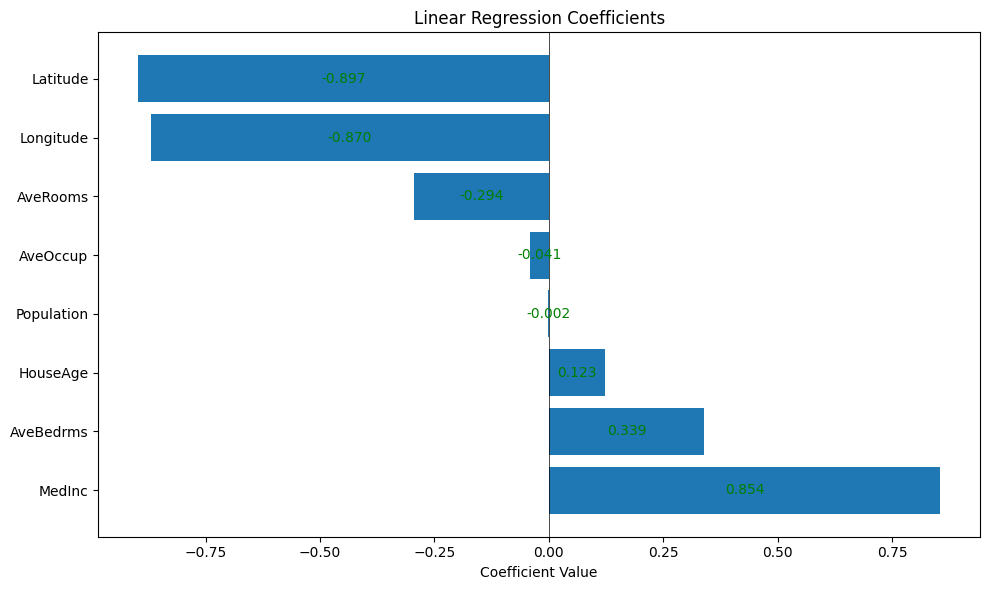


Feature with highest positive impact: MedInc
Coefficient value: 0.8544


In [66]:
# 3-1. Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 3-2. Calculate performance metrics
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate R² scores
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print("Linear Regression Results:")
print(f"Train R² Score: {train_r2_lr:.4f}")
print(f"Test R² Score: {test_r2_lr:.4f}")
print(f"Overfitting indicator (Train-Test difference): {abs(train_r2_lr - test_r2_lr):.4f}")

# 3-3. Display and analyze model coefficients
# Create DataFrame with feature names and coefficients
lr_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_
})

# Sort coefficients in descending order
lr_coefficients = lr_coefficients.sort_values('Coefficient', ascending=False)

print("\nLinear Regression Coefficients (sorted):")
print(lr_coefficients.to_string(index=False))

# Visualize coefficients with horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(lr_coefficients['Feature'], lr_coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width/2, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='center', va='center', color='green')

plt.tight_layout()
plt.show()

# Identify feature with highest positive impact
print(f"\nFeature with highest positive impact: {lr_coefficients.iloc[0]['Feature']}")
print(f"Coefficient value: {lr_coefficients.iloc[0]['Coefficient']:.4f}")


# Part 4:

Elastic Net Model


Elastic Net Results (alpha=0.1, l1_ratio=0.5):
Train R² Score: 0.5308
Test R² Score: 0.5148
Overfitting indicator (Train-Test difference): 0.0160

Comparison of Linear Regression and Elastic Net Coefficients:
   Feature  Coefficient  Coefficient_EN  Difference  Shrinkage_Ratio
    MedInc     0.854383        0.713818    0.140565         0.835477
 AveBedrms     0.339259        0.000000    0.339259         0.000000
  HouseAge     0.122546        0.137288   -0.014742         1.120295
Population    -0.002308        0.000000   -0.002308         0.000000
  AveOccup    -0.040829       -0.000000   -0.040829         0.000000
  AveRooms    -0.294410       -0.000000   -0.294410         0.000000
 Longitude    -0.869842       -0.133250   -0.736592         0.153189
  Latitude    -0.896929       -0.175737   -0.721192         0.195932


C:\Users\mht\AppData\Local\Temp\ipykernel_11480\2688866036.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(comparison_df['Feature'], rotation=45)


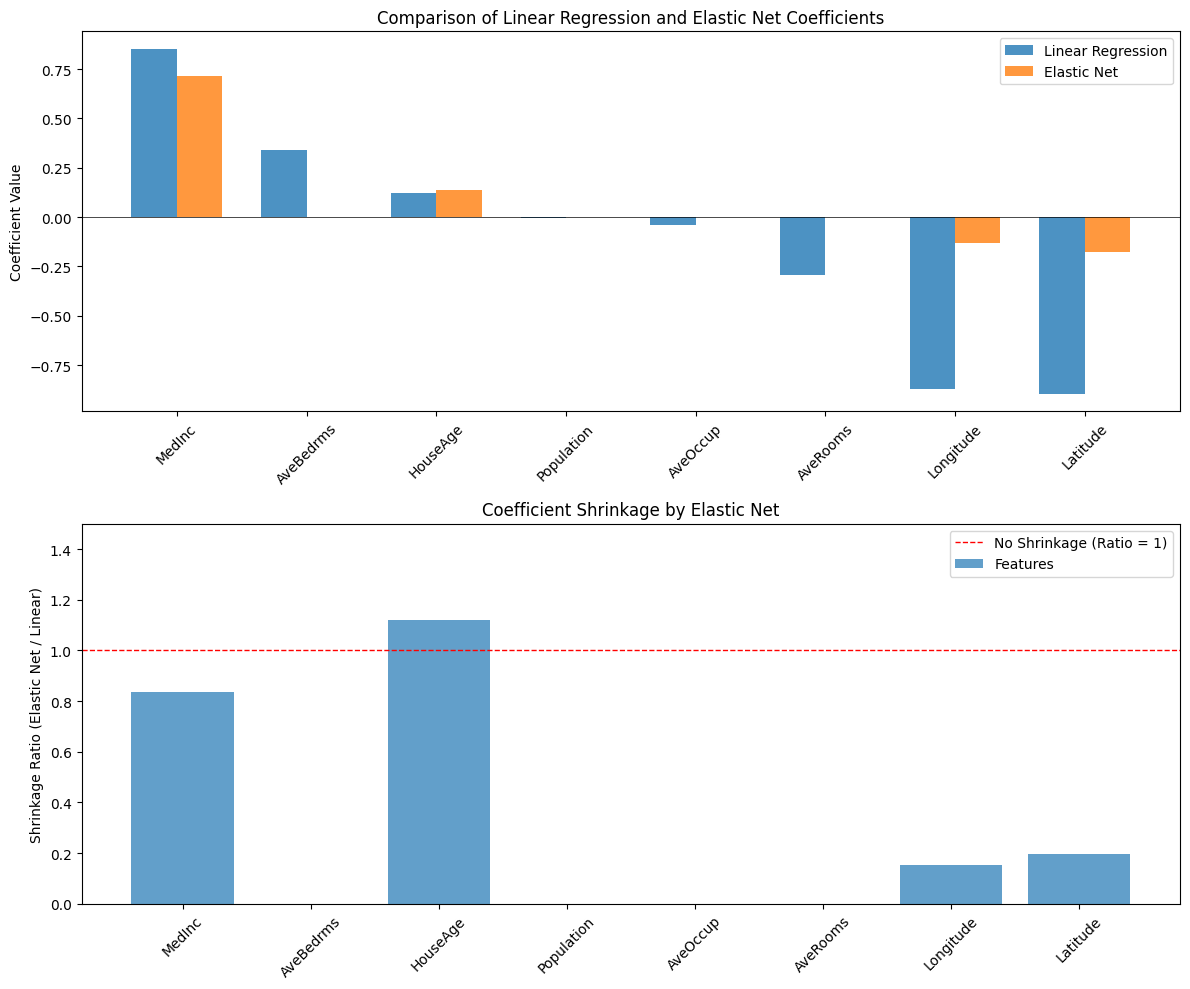

In [67]:
# 4-1. Create and train Elastic Net model with specified hyperparameters
from cProfile import label


elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

# 4-2. Calculate performance metrics for Elastic Net
y_train_pred_en = elastic_net.predict(X_train_scaled)
y_test_pred_en = elastic_net.predict(X_test_scaled)

train_r2_en = r2_score(y_train, y_train_pred_en)
test_r2_en = r2_score(y_test, y_test_pred_en)

print("Elastic Net Results (alpha=0.1, l1_ratio=0.5):")
print(f"Train R² Score: {train_r2_en:.4f}")
print(f"Test R² Score: {test_r2_en:.4f}")
print(f"Overfitting indicator (Train-Test difference): {abs(train_r2_en - test_r2_en):.4f}")

# 4-3. Compare coefficients between Linear Regression and Elastic Net
# Create DataFrame for Elastic Net coefficients
en_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_EN': elastic_net.coef_
})

# Merge Linear Regression and Elastic Net coefficients for comparison
comparison_df = pd.merge(lr_coefficients, en_coefficients, on='Feature')
# Calculate difference and shrinkage ratio
comparison_df['Difference'] = comparison_df['Coefficient'] - comparison_df['Coefficient_EN']
comparison_df['Shrinkage_Ratio'] = np.abs(comparison_df['Coefficient_EN'] / comparison_df['Coefficient'])
# Sort by Linear Regression coefficient values
comparison_df = comparison_df.sort_values('Coefficient', ascending=False)

print("\nComparison of Linear Regression and Elastic Net Coefficients:")
print(comparison_df.to_string(index=False))

# Visual comparison of coefficients
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Coefficient values comparison
x = np.arange(len(feature_names))
width = 0.35
axes[0].bar(x - width/2, comparison_df['Coefficient'], width, 
            label='Linear Regression', alpha=0.8)
axes[0].bar(x + width/2, comparison_df['Coefficient_EN'], width, 
            label='Elastic Net', alpha=0.8)
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_df['Feature'], rotation=45)
axes[0].set_ylabel('Coefficient Value')
axes[0].set_title('Comparison of Linear Regression and Elastic Net Coefficients')
axes[0].legend()
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Plot 2: Shrinkage ratio visualization
axes[1].bar(comparison_df['Feature'], comparison_df['Shrinkage_Ratio'], alpha=0.7,label='Features')
axes[1].set_xticklabels(comparison_df['Feature'], rotation=45)
axes[1].set_ylabel('Shrinkage Ratio (Elastic Net / Linear)')
axes[1].set_title('Coefficient Shrinkage by Elastic Net')
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=1, 
                label='No Shrinkage (Ratio = 1)')
axes[1].set_ylim(0,1.5)
axes[1].legend()

plt.tight_layout()
plt.show()


# Part 5:

Analysis of Results


In [68]:
print("1. Overfitting Comparison:")
print(f"   Linear Regression: difference = {abs(train_r2_lr - test_r2_lr):.4f}")
print(f"   Elastic Net: difference = {abs(train_r2_en - test_r2_en):.4f}")

# Determine which model has less overfitting
if abs(train_r2_lr - test_r2_lr) > abs(train_r2_en - test_r2_en):
    print("   Elastic Net has less overfitting.")
else:
    print("   Linear Regression has less overfitting.")

print("\n2. Shrinkage Analysis:")
mean_shrinkage = comparison_df['Shrinkage_Ratio'].mean()
print(f"   Average shrinkage ratio: {mean_shrinkage:.4f}")

if mean_shrinkage<.3:
    print("   Elastic Net has shrunk most coefficients.")
elif mean_shrinkage <.5:
    print("   Elastic Net has shrunk coefficients.")
elif mean_shrinkage <.7:
    print("   Elastic Net has not shrunk coefficients.")
else:
    print("   Elastic Net has not shrunk most coefficients.")

print("\n3. Generalization Performance Comparison:")
print(f"   Linear Regression Test R²: {test_r2_lr:.4f}")
print(f"   Elastic Net Test R²: {test_r2_en:.4f}")

# Determine which model generalizes better
if test_r2_en > test_r2_lr:
    print("   Elastic Net performs better on new data.")
else:
    print("   Linear Regression performs better on new data.")

1. Overfitting Comparison:
   Linear Regression: difference = 0.0368
   Elastic Net: difference = 0.0160
   Elastic Net has less overfitting.

2. Shrinkage Analysis:
   Average shrinkage ratio: 0.2881
   Elastic Net has shrunk most coefficients.

3. Generalization Performance Comparison:
   Linear Regression Test R²: 0.5758
   Elastic Net Test R²: 0.5148
   Linear Regression performs better on new data.


# Part 6:

Regularization Explanation (Educational Section) and Hyperparameters


In [69]:
print("""
Elastic Net Hyperparameters:

1. Alpha (α):
   • Controls the strength of regularization
   • Small alpha (e.g., 0.01): Low penalty → larger coefficients → risk of overfitting
   • Large alpha (e.g., 10): High penalty → smaller coefficients → risk of underfitting
   • Optimal alpha: Balance between complexity and generalization

2. l1_ratio:
   • Determines the mix of L1 and L2 regularization
   • l1_ratio = 0.5 → 50% L1 (Lasso) + 50% L2 (Ridge)
   • l1_ratio = 1 → Pure L1 (Lasso)
   • l1_ratio = 0 → Pure L2 (Ridge)
""")




Elastic Net Hyperparameters:

1. Alpha (α):
   • Controls the strength of regularization
   • Small alpha (e.g., 0.01): Low penalty → larger coefficients → risk of overfitting
   • Large alpha (e.g., 10): High penalty → smaller coefficients → risk of underfitting
   • Optimal alpha: Balance between complexity and generalization

2. l1_ratio:
   • Determines the mix of L1 and L2 regularization
   • l1_ratio = 0.5 → 50% L1 (Lasso) + 50% L2 (Ridge)
   • l1_ratio = 1 → Pure L1 (Lasso)
   • l1_ratio = 0 → Pure L2 (Ridge)



# Part 7:

Dimensionality Reduction with PCA


Data shape after PCA:
  Training data: (16512, 5)
  Testing data: (4128, 5)

Explained Variance Ratio:
  Component 1: 0.253 (Cumulative: 0.253)
  Component 2: 0.234 (Cumulative: 0.487)
  Component 3: 0.159 (Cumulative: 0.646)
  Component 4: 0.130 (Cumulative: 0.776)
  Component 5: 0.125 (Cumulative: 0.902)


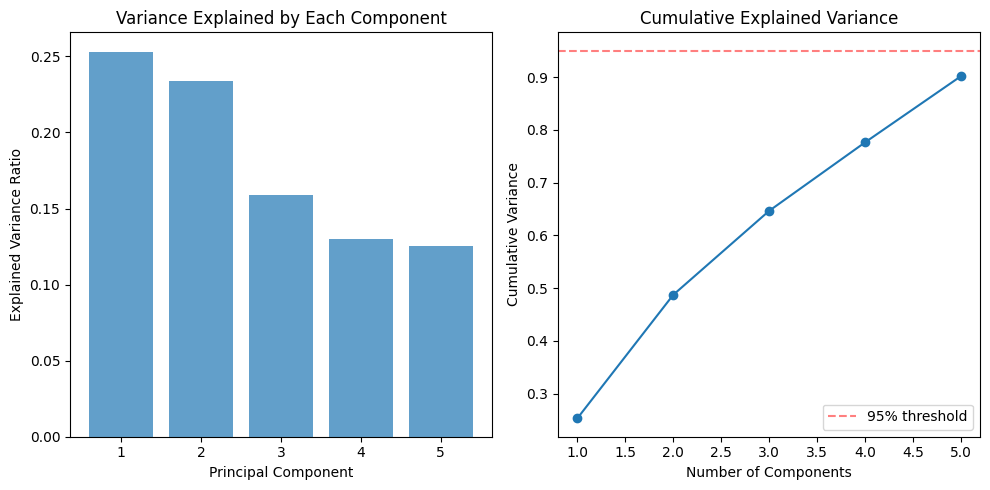


PCA + Linear Regression Results:
Train R² Score: 0.4567
Test R² Score: 0.4329
Overfitting indicator (Train-Test difference): 0.0238


In [70]:
# 7-1. Apply PCA to reduce dimensions to 5 principal components
pca = PCA(n_components=5, random_state=42)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Data shape after PCA:")
print(f"  Training data: {X_train_pca.shape}")
print(f"  Testing data: {X_test_pca.shape}")

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("\nExplained Variance Ratio:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance), 1):
    print(f"  Component {i}: {var:.3f} (Cumulative: {cum_var:.3f})")

# Visualize explained variance
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5, label='95% threshold')
plt.legend()

plt.tight_layout()
plt.show()

# 7-2. Train Linear Regression on PCA-transformed data
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

# Calculate performance metrics
y_train_pred_pca = lr_pca.predict(X_train_pca)
y_test_pred_pca = lr_pca.predict(X_test_pca)

train_r2_pca = r2_score(y_train, y_train_pred_pca)
test_r2_pca = r2_score(y_test, y_test_pred_pca)

print("\nPCA + Linear Regression Results:")
print(f"Train R² Score: {train_r2_pca:.4f}")
print(f"Test R² Score: {test_r2_pca:.4f}")
print(f"Overfitting indicator (Train-Test difference): {abs(train_r2_pca - test_r2_pca):.4f}")


# Part 8:

Final Comparison of Three Approaches and Analysis


Model Performance Comparison Table:
                  Model  Train_R2  Test_R2  Overfitting_Gap
      Linear Regression  0.612551 0.575788         0.036763
            Elastic Net  0.530762 0.514765         0.015997
PCA + Linear Regression  0.456729 0.432923         0.023806


C:\Users\mht\AppData\Local\Temp\ipykernel_11480\1757536855.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(results_comparison['Model'], rotation=15)
C:\Users\mht\AppData\Local\Temp\ipykernel_11480\1757536855.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(results_comparison['Model'], rotation=15)


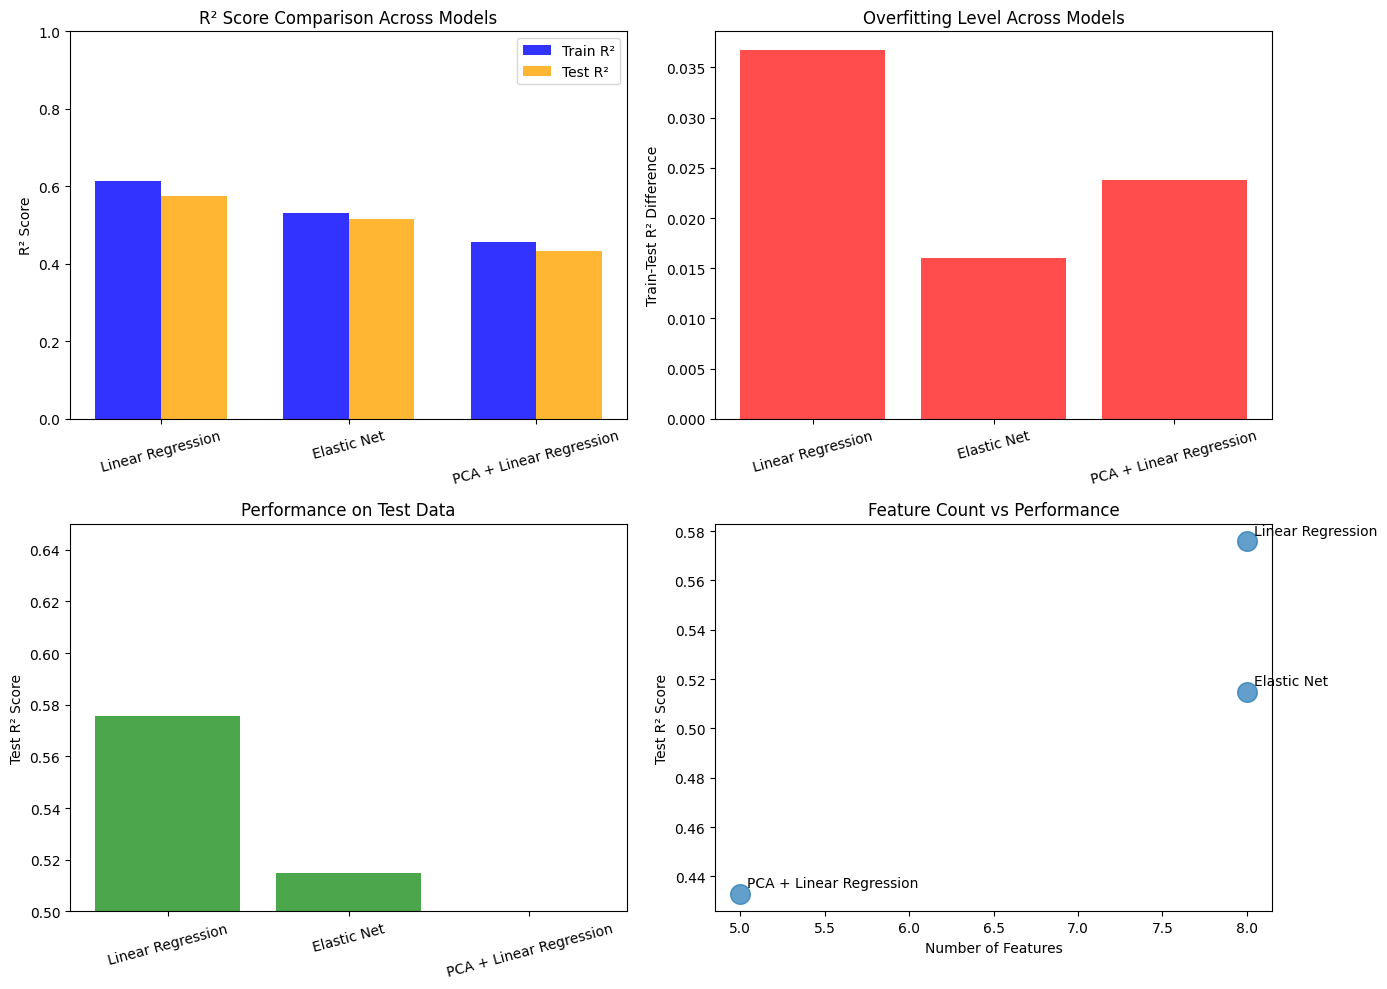

In [71]:
# Create comprehensive comparison table
results_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Elastic Net', 'PCA + Linear Regression'],
    'Train_R2': [train_r2_lr, train_r2_en, train_r2_pca],
    'Test_R2': [test_r2_lr, test_r2_en, test_r2_pca],
    'Overfitting_Gap': [abs(train_r2_lr - test_r2_lr), 
                       abs(train_r2_en - test_r2_en), 
                       abs(train_r2_pca - test_r2_pca)]
})

print("Model Performance Comparison Table:")
print(results_comparison.to_string(index=False))

# Visual comparison of all models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: R² Scores comparison (Train vs Test)
x = np.arange(3)
width = 0.35
axes[0, 0].bar(x - width/2, results_comparison['Train_R2'], width, 
               label='Train R²', alpha=0.8, color='blue')
axes[0, 0].bar(x + width/2, results_comparison['Test_R2'], width, 
               label='Test R²', alpha=0.8, color='orange')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(results_comparison['Model'], rotation=15)
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('R² Score Comparison Across Models')
axes[0, 0].legend()
axes[0, 0].set_ylim([0, 1])

# Plot 2: Overfitting gap comparison
axes[0, 1].bar(results_comparison['Model'], results_comparison['Overfitting_Gap'], 
               alpha=0.7, color='red')
axes[0, 1].set_xticklabels(results_comparison['Model'], rotation=15)
axes[0, 1].set_ylabel('Train-Test R² Difference')
axes[0, 1].set_title('Overfitting Level Across Models')

# Plot 3: Test R² comparison
axes[1, 0].bar(results_comparison['Model'], results_comparison['Test_R2'], 
               alpha=0.7, color='green')
axes[1, 0].set_xticklabels(results_comparison['Model'], rotation=15)
axes[1, 0].set_ylabel('Test R² Score')
axes[1, 0].set_title('Performance on Test Data')
axes[1, 0].set_ylim([0.5, 0.65])

# Plot 4: Model complexity vs performance
num_features = [8, 8, 5]  # Number of features used by each model
axes[1, 1].scatter(num_features, results_comparison['Test_R2'], 
                   s=200, alpha=0.7)
for i, model in enumerate(results_comparison['Model']):
    axes[1, 1].annotate(model, (num_features[i], results_comparison['Test_R2'][i]),
                       xytext=(5, 5), textcoords='offset points')
axes[1, 1].set_xlabel('Number of Features')
axes[1, 1].set_ylabel('Test R² Score')
axes[1, 1].set_title('Feature Count vs Performance')

plt.tight_layout()
plt.show()



# Final Analysis Summary


In [72]:
# Identify best performing model
best_test_model = results_comparison.loc[results_comparison['Test_R2'].idxmax(), 'Model']
best_test_score = results_comparison['Test_R2'].max()
lowest_overfitting = results_comparison.loc[results_comparison['Overfitting_Gap'].idxmin(), 'Model']

print(f"1. Best model based on Test R²: {best_test_model} with Score = {best_test_score:.4f}")
print(f"2. Model with least overfitting: {lowest_overfitting}")


1. Best model based on Test R²: Linear Regression with Score = 0.5758
2. Model with least overfitting: Elastic Net


3. Comparison of three approaches:

a) Simple Linear Regression:

• Highest Train R²

• Highest potential for overfitting

• Large, unrestricted coefficients

b) Elastic Net:

• Applies regularization to prevent overfitting

• Shrinks coefficients (regularization effect)

• Combines benefits of L1 and L2 regularization

c) PCA + Linear Regression:

• Reduces dimensionality and removes multicollinearity

• Simplifies model complexity

• Retains 95% variance with 5 components instead of 8 features


4. Recommendations:

   • If features are highly correlated: Use PCA or Elastic Net

   • If feature selection is important: Use L1 or Elastic Net with high l1_ratio

   • If generalization is critical: Use regularization techniques

   • If interpretability is important: Use simple Linear Regression
